In [1]:
import POIO as po

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np


In [2]:
# ou sont les données ... 
# Dir = '/home/jbvielfaure/Desktop/JEREMY/DATA_simu/HI_D_SMC/00164/star1/Lya_direction1/'
Dir      = '/home/jbvielfaure/Desktop/JEREMY/DATA_simu/HI_D_SMC/00164/star_best/test_3dir_new_old_RASCAS/direction100_3_123_164_old/'
# direction100_100k2/'

FileName = 'LyaPhotIC_100k.recLya.result.1' 
nameSave = '100k3_3test2'
# unités etc correspondant au pas de temps utilisé (164)
redshift =  1./0.250002220774516-1.
unit_l   =  0.229476043567044E+26  # convertit les longueurs en cm 
print(redshift)

# les constantes ... 
pc2cm = 3.086e18
cm2pc = 1./pc2cm

# la cosmologie ... 
from astropy.cosmology import FlatLambdaCDM, z_at_value
import astropy.units as u
cosmo = FlatLambdaCDM(H0=67.11,Om0=0.3175)
# angular distance scale and luminosity distance
a =  cosmo.arcsec_per_kpc_proper(redshift)
unit_l_pkpc = unit_l * cm2pc / 1000. # converts comoving code units to phys. kpc
unit_l_arcsec = unit_l_pkpc * a.value
lumDist    = cosmo.luminosity_distance(redshift)
lumDist_cm = lumDist.cgs.value

2.999964467923379


In [3]:
# lecture des mocks
ncpu = 24  # nb de cpus utilisés pour le calcul 
# for id_ind in np.arange(3):
idir = 3
mock = po.mockobs(Dir,FileName,ncpu,load_cube=True,unit_l_arcsec=unit_l_arcsec,lumdist_cm=lumDist_cm,redshift=redshift,idirection=idir)

## Compute and plot image

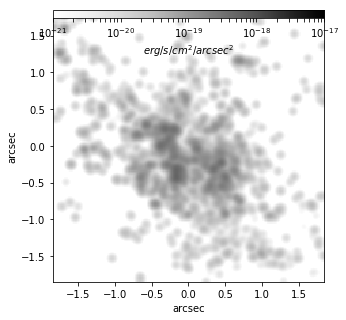

In [4]:
image = np.sum(mock.cube,axis=2) * mock.cube_dlbda_Angstrom
smooth_scale_pix = 2  # un petit smoothing ... 
if smooth_scale_pix > 0:
    import scipy.ndimage as ndimage
    image = ndimage.gaussian_filter(image,sigma=(smooth_scale_pix,smooth_scale_pix))

plt.figure(figsize=(5,5))
ax = plt.subplot(111)
# im = plt.imshow(image,norm=LogNorm(),vmin=image.max()/1e3,vmax=image.max(),origin='lower', \
#            extent=[mock.cube_xmin_arcsec,mock.cube_xmax_arcsec,mock.cube_xmin_arcsec,mock.cube_xmax_arcsec],\
#            cmap='Greys')
im = plt.imshow(image,norm=LogNorm(),vmin=1e-21,vmax=1e-17,origin='lower', \
           extent=[mock.cube_xmin_arcsec,mock.cube_xmax_arcsec,mock.cube_xmin_arcsec,mock.cube_xmax_arcsec],\
           cmap='Greys')
plt.xlabel('arcsec')
plt.ylabel('arcsec')
# la color bar 
axins = inset_axes(ax,width="100%",height="3%",loc=1,borderpad=0)
cbar  = plt.colorbar(im,cax=axins,orientation='horizontal',label=r'$erg/s/cm^2/arcsec^2$')

plt.savefig(Dir+'PLOTs/'+'image_'+nameSave+'.pdf')
plt.savefig(Dir+'PLOTs/'+'image_'+nameSave+'.png')

## Compute and plot spectrum 

2.999964467923379


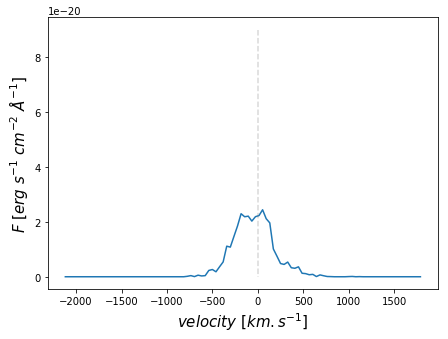

In [5]:
spectrum = np.sum(mock.cube,axis=(0,1)) * mock.cube_dx_arcsec * mock.cube_dx_arcsec
plt.figure(figsize=(7,5))
lambda0 = (1+redshift)*1215.67
# v = (mock.cube_lbda_Angstrom - ((1+redshift)*1215.67))/((1+redshift)*1215.67)*299792.458
v = 299792.458*((mock.cube_lbda_Angstrom - lambda0)/lambda0)
print(redshift)
fill_txt = open(Dir+'PLOTs/'+'spectre_'+nameSave+'.dat', "w")
for val in range(len(mock.cube_lbda_Angstrom)):
    fill_txt.write('%.6e %.6e\n' % (mock.cube_lbda_Angstrom[val], spectrum[val]))
fill_txt.close()

plt.plot(v,spectrum)
# plt.plot(mock.cube_lbda_Angstrom,spectrum)
plt.plot([0,0],[9e-20, 0], '--', alpha=0.3, color='gray')
# plt.xlabel(r'$\lambda_{\rm obs} \ [\AA]$',fontsize=15)
plt.xlabel(r'$velocity \ [km.s^{-1}]$',fontsize=15)
plt.ylabel(r'$F \ [erg \ s^{-1}\ cm^{-2}\ \AA^{-1}]$',fontsize=15)
#plt.axvline(1215.67*(1.+redshift),color='red',linewidth=0.5)
plt.savefig(Dir+'PLOTs/'+'spectre_'+nameSave+'.pdf')
plt.savefig(Dir+'PLOTs/'+'spectre_'+nameSave+'.png')
